# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
# импортируем библиотеку pandas
import pandas as pd
# читаем файл и сохраняем его в переменной df
df = pd.read_csv('/datasets/data.csv')
# выведем на экран первые 20 строк таблицы
display(df.head(20))


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


выведем на экран информацию о файле

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


**Вывод**

Всего строк в таблице 21525.В столбцах "days_employed" и "total_income" есть отсутствующие данные. Все данные с типом object необходимо будет привести к одному регистру. Вызывают сомнения данные в столбце "days_employed", непонятно, почему некоторые данные имеют отрицательные значения. Если стаж выражен в днях, то данные очень странные. 

## Шаг 2. Предобработка данных

### Обработка пропусков

Методом isna() найдём все строки с пропусками в столбце total_income и просмотрим первые пять

In [3]:
display(df[df['total_income'].isna()].head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [4]:
# заменим NaN на медианное значение дохода в соответствующей категории заемщика 
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))
# заменим NaN на нули методом fillna() в столбце days_employed
df['days_employed'] = df['days_employed'].fillna(0)
display(df.head(20))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [5]:
# убедимся, что все пропуски заполнены
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


**Вывод**

1. В результате анализа информации о таблице мы выяснили, что пропущенные значения есть в столбцах "days_employed" и "total_income". Методом isna() найдём все строки с пропусками в столбце total_income и просмотрим первые пять. 
Видим, что пропуски по этому столбцу аналогичны пропускам в столбце days_employed. Т.к. данные по слобцу days_employed не важны для целей исследования, но в тех же строках остаются ценные для нас данные (семейное положение и количество детей), то заменим NaN на нули методом  fillna(). 
Пропуски по столбцу total_income заменим медианным значением по каждому типу дохода. Еще раз посмотрим инфо о таблице.
Все, теперь пропусков нет.


### Замена типа данных

In [6]:
# Изменим тип данных в столбце days_employed с float64 на целые числа
df['days_employed'] = df['days_employed'].astype('int')
# Посмотрим, что получилось
display(df.head(20))


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [7]:
# проверим информацию
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  int64  
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB
None


**Вывод**

 При чтении информации о таблице мы заметили, что графа о стаже days_employed имеет нетипичный для него тип float. После обработки методом astype перевели столбец в целые числа. Убедились, что после преобразования данные в столбце days_employed имеют тип int

### Обработка дубликатов

In [8]:
# подсчитаем количество явных дубликатов в таблице
df.duplicated().sum()
# посмотрим строки с дубликатами
df[df.duplicated()]

# Приведем значения в столбце education к одному регистру
df['education'] = df['education'].str.lower()
# Посмотрим уникальные значения в столбце education
df['education'].unique()






array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

**Вывод**

Видим,что в таблице 71 явных дубликатов. Проанализировав строки, в которых содержатся явные дубликаты, видим, что они содержатся в столбце total_income. Данные в этом столбце полностью совпадают, что маловероятно. В то же время видим, что они различны по столбцу income_type (по пенсионерам 118514.486412, по сотрудникам 142594.396847). Можно сделать вывод, что это медианные значения, которыми мы заполняли пропуски, поэтому не будем их удалять. Но даже если это не так, количество 71 - 0,3%от всех данных, поэтому на результат это не повлияет.
Далее займемся неявными дубликатами. Приведем значения в столбце education к одному регистру.
Проверим неявные дубликаты в этом столбце. Все, дубликатов больше нет




### Лемматизация

In [9]:
# Посмотрим, какие цели присутствуют в гр. purpose
purpose = df['purpose'].value_counts()
print(purpose)
# напишем функцию лемматизации, которую применим к столбцу purpose
from pymystem3 import Mystem
m = Mystem()
def new_category_purpose(row):
    lem_purpose = m.lemmatize(row['purpose'])
    if ('жилье' in lem_purpose) or ('недвижимость' in lem_purpose):
        return 'недвижимость'
    if 'свадьба' in lem_purpose:
        return 'свадьба'
    if 'образование' in lem_purpose:
        return 'образование'
    return 'автомобиль'
df['purpose_new_category'] = df.apply(new_category_purpose, axis=1)

# убедимся, что функция сработала, посмотрим новый столбец purpose_new_category
display(df.head(20))

print(df['purpose_new_category'].value_counts())    





 


свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_new_category
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба
5,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,недвижимость
6,0,-2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,недвижимость
7,0,-152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,образование
8,2,-6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,свадьба
9,0,-2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,недвижимость


недвижимость    10840
автомобиль       4315
образование      4022
свадьба          2348
Name: purpose_new_category, dtype: int64


**Вывод**

Видим, что столбец purpose заполнен произвольно, применим к нему лемматизацию. Исходя из анализа столбца purpose можно сделать вывод, что у людей 5 основных целей получения кредита:
- приобретение недвижимости,
- приобретение жилья,
- покупка автомобиля,
- образование,
- проведение свадьбы.
Для дальнейшей категоризации нам нужно составить словарь из лемм.
Все верно, в новом столбце purpose_new_category осталось только четыре категории

### Категоризация данных

**Категоризация по целям кредита**


Сгруппируем данные по столбцу purpose_new_category и найдем среднее количество имеющих просрочку в каждой группе 	

In [10]:
df_purpose = df.groupby('purpose_new_category').agg({'debt':['count', 'mean']})
print(df_purpose)

                       debt          
                      count      mean
purpose_new_category                 
автомобиль             4315  0.093395
недвижимость          10840  0.072140
образование            4022  0.091994
свадьба                2348  0.079216


Сделаем через сводную таблицу

In [11]:
df_purpose_pivot = df.pivot_table(index='purpose_new_category', columns='debt', values='children', aggfunc='count')
df_purpose_pivot['debt_share'] = (df_purpose_pivot[1]/(df_purpose_pivot[0]+df_purpose_pivot[1]))

display(df_purpose_pivot)

debt,0,1,debt_share
purpose_new_category,,,
автомобиль,3912,403,0.093395
недвижимость,10058,782,0.072140
образование,3652,370,0.091994
свадьба,2162,186,0.079216


**Вывод**

Таким образом, наименьшая доля просроченных кредитов у покупателей недвижимости, далее - у молодоженов, самая большая - у покупателей автомобилей

**Категоризация по наличию детей**

Сначала из общего файла выделим новую таблицу с количеством детей и просрочкой.

In [12]:
df_children_group = df[['children', 'debt']]
display(df_children_group.head(5))

,children,debt
0,1,0
1,1,0
2,0,0
3,3,0
4,0,0


теперь разделим всех заемщиков на группы:"есть дети" и "нет детей". Добавим новый столбец children_group

In [13]:
df.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Видим, что 76 заемщиков имеют по 20 детей, что маловероятно. Скорее всего, сотрудник банка, обрабатывая анкеты заемщиков, механически поставил лишний ноль. Поэтому изначально заменим 20 детей на 2. Что касается отрицательного значения -1, с большой долей вероятности это не отрицательное значение, а тире в анкете. Поэтому здесь просто приведем к модулю числа.
Еще раз применим метод value_count для проверки результата   


In [14]:
df['children'] = df['children'].replace(20,2)
df['children'] = df['children'].abs()
df.children.value_counts()


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [15]:
def children_groupe(row):
    if row==0:
        return 'нет детей'
    return 'есть дети'
df_children_group['children_group'] = df_children_group['children'].apply(children_groupe)

display(df_children_group.head(5))




/tmp/ipykernel_132/3926145391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_children_group['children_group'] = df_children_group['children'].apply(children_groupe)


,children,debt,children_group
0,1,0,есть дети
1,1,0,есть дети
2,0,0,нет детей
3,3,0,есть дети
4,0,0,нет детей


Теперь создадим сводную таблицу по ранее созданной

In [16]:
children_debt_pivot = df_children_group.pivot_table(index='children_group', columns='debt', values='children', aggfunc='count')

display(children_debt_pivot)

debt,0,1
children_group,,
есть дети,6698,678
нет детей,13086,1063


Добавляем в сводную таблицу столбец с долей просрочек по каждой группе

In [17]:
children_debt_pivot['debt_share'] = (children_debt_pivot[1]/(children_debt_pivot[0]+children_debt_pivot[1]))

display(children_debt_pivot)

debt,0,1,debt_share
children_group,,,
есть дети,6698,678,0.091920
нет детей,13086,1063,0.075129


**Вывод**

Таким образом, видим, что заемщики, не имеющие детей, более дисциплинированны в плане возврата кредита

In [18]:
df_children_group.groupby('children_group')['debt'].agg(['count','sum','mean'])

,count,sum,mean
children_group,,,
есть дети,7376,678,0.091920
нет детей,14149,1063,0.075129


In [19]:
def my_mean(x): return x.mean()*100

# В кач-ве агрегирования можно любую функцию брать.
df_children_group.groupby('children_group')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children_group,,,
есть дети,7376,678,9.191974
нет детей,14149,1063,7.512898


In [20]:
def my_mean(x): return '{:.2%} '.format(x.mean())

df_children_group.groupby('children_group')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children_group,,,
есть дети,7376,678,9.19%
нет детей,14149,1063,7.51%


**Категоризация по семейному положению**

Сгруппируем данные по столбцу family_status и найдем среднее количество имеющих просрочку в каждой группе

In [21]:
df_family_status = df.groupby('family_status').agg({'debt':['count', 'mean']})
print(df_family_status)

                        debt          
                       count      mean
family_status                         
Не женат / не замужем   2813  0.097405
в разводе               1195  0.071130
вдовец / вдова           960  0.065625
гражданский брак        4177  0.092890
женат / замужем        12380  0.075202


Попробуем через сводную таблицу

In [22]:
df_family_pivot = df.pivot_table(index='family_status', columns='debt', values='children', aggfunc='count')
df_family_pivot['debt_share'] = (df_family_pivot[1]/(df_family_pivot[0]+df_family_pivot[1]))

display(df_family_pivot)

debt,0,1,debt_share
family_status,,,
Не женат / не замужем,2539,274,0.097405
в разводе,1110,85,0.071130
вдовец / вдова,897,63,0.065625
гражданский брак,3789,388,0.092890
женат / замужем,11449,931,0.075202


**Вывод**

Получается, что вдовы и вдовцы - самые дисциплинированные, а наиболее часто допускающие просрочку - не женатые и не замужние

**Категоризация по уровню дохода**

Напишем функцию для группировки заемщиков по уровню дохода

In [23]:
def total_income_group(total_income):
    if total_income<=100000:
        return 'Бедные'
    if total_income<=300000:
        return 'Средний класс'
    return 'Богатые'
df['income_group'] = df['total_income'].apply(total_income_group)
display(df.head(5))


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_new_category,income_group
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,Средний класс
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,Средний класс
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,Средний класс
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,Средний класс
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,Средний класс


Введем следующую градацию: доход до 50000 руб - за чертой бедности,
                                 до 100000 руб. - бедные,
                                 до 200000 руб. - средний класс,
                                 до 400000 руб. - состоятельные,
                                 выше 400000 руб. - богатые.     


In [24]:
def total_income_group(total_income):
    if total_income<=50000:
        return 'За чертой бедности'
    if total_income<=100000:
        return 'Бедные'
    if total_income<=200000:
        return 'Средний класс'
    if total_income<=400000:
        return 'Состоятельные'
    return 'Богатые'
df['income_group'] = df['total_income'].apply(total_income_group)
display(df.head(5))


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_new_category,income_group
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,Состоятельные
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,Средний класс
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,Средний класс
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,Состоятельные
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,Средний класс


In [25]:
income_debt = df.groupby('income_group').agg({'debt':['count', 'mean']})
print(income_debt)

                     debt          
                    count      mean
income_group                       
Бедные               4091  0.080909
Богатые               529  0.058601
За чертой бедности    372  0.061828
Состоятельные        4538  0.072058
Средний класс       11995  0.085786


In [26]:
df_income_pivot = df.pivot_table(index='income_group', columns='debt', values='total_income', aggfunc='count')
df_income_pivot['debt_share'] = (df_income_pivot[1]/(df_income_pivot[0]+df_income_pivot[1]))
display(df_income_pivot)

debt,0,1,debt_share
income_group,,,
Бедные,3760,331,0.080909
Богатые,498,31,0.058601
За чертой бедности,349,23,0.061828
Состоятельные,4211,327,0.072058
Средний класс,10966,1029,0.085786


**Вывод**

Таким образом, наибольшую просрочку допускают люди с доходом от 50000 до 200000 руб. Но их доля не сильно отличается от других групп


## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

<AxesSubplot:xlabel='children_group'>

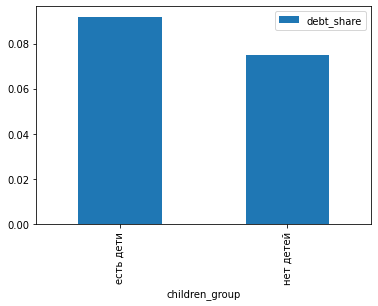

In [27]:
children_debt_pivot.plot(y='debt_share', kind='bar')



**Вывод**

Заемщики, не имеющие детей, более дисциплинированны в плане возврата кредита. Доля бездетных заемщиков, допускающих просрочку, составляет 7,5% от общего их числа. В то время как заемщики, имеющие детей, доускают просрочку в 9,2% случаев 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

<AxesSubplot:xlabel='family_status'>

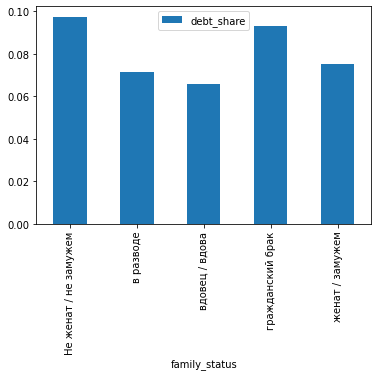

In [28]:
df_family_pivot.plot(y='debt_share', kind='bar')


Вдовы и вдовцы - самые дисциплинированные, а наиболее часто допускающие просрочку - не женатые и не замужние, а также живущие в гражданском браке

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<AxesSubplot:title={'center':'Доля должников по уровню дохода'}, xlabel='income_group'>

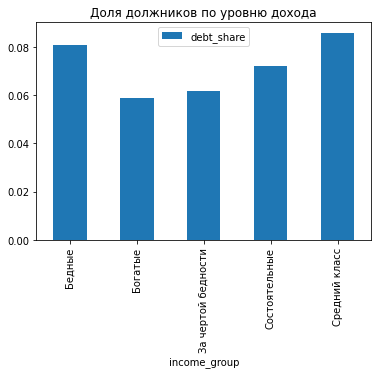

In [29]:
df_income_pivot.plot(y='debt_share', kind='bar', title='Доля должников по уровню дохода')


**Вывод**

 Наибольшую просрочку допускают люди с доходом от 100000 до 300000 руб. Но их доля не сильно отличается от других групп

- Как разные цели кредита влияют на его возврат в срок?

<AxesSubplot:xlabel='purpose_new_category'>

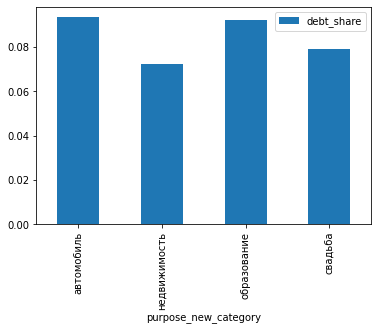

In [30]:
df_purpose_pivot.plot(y='debt_share', kind='bar')


**Вывод**

Наименьшая доля просроченных кредитов у покупателей недвижимости, далее - у молодоженов, самая большая - у покупателей автомобилей

## Шаг 4. Общий вывод

Исходя из проведенных исследований можно сделать следующие выводы:

Наиболее ответственно к оплате долгов по кредитам подходят:

    - покупатели недвижимости (7,2% невозврата в срок),     
    - не имеющие детей(7,5% невозврата в срок),
    - вдовы/вдовцы (6,5% невозврата в срок),
    - заемщики с доходом более 400 тыс.руб. на члена семьи (5,9% невозврата в срок).
    
Наименее ответственные:

    - люди, не состоящие в браке (9,7% невозврата в срок), 
    - имеющие детей (9,2% невозврата в срок), 
    - планирующие покупать автомобиль (9,3% невозврата в срок), 
    - с доходом на члена семьи от 100 до 200 тыс.руб.(8,5% невозврата в срок)
